<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/417_Pacific_Atlantic_Water_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 417. Pacific Atlantic Water Flow

There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.



Example 1:

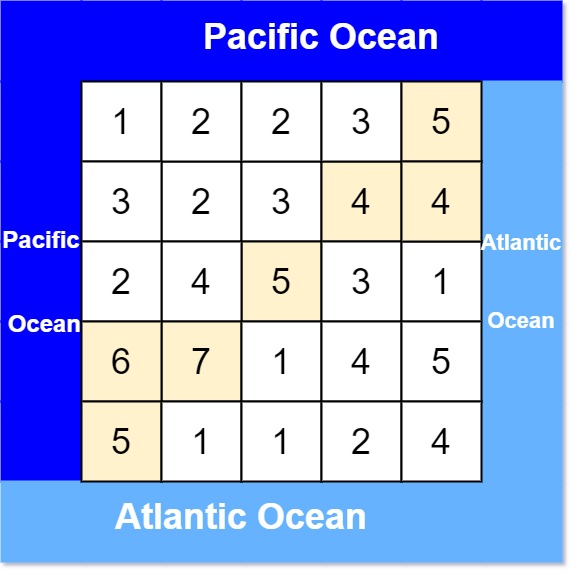

Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
Explanation: The following cells can flow to the Pacific and Atlantic oceans, as shown below:
[0,4]: [0,4] -> Pacific Ocean
       [0,4] -> Atlantic Ocean
[1,3]: [1,3] -> [0,3] -> Pacific Ocean
       [1,3] -> [1,4] -> Atlantic Ocean
[1,4]: [1,4] -> [1,3] -> [0,3] -> Pacific Ocean
       [1,4] -> Atlantic Ocean
[2,2]: [2,2] -> [1,2] -> [0,2] -> Pacific Ocean
       [2,2] -> [2,3] -> [2,4] -> Atlantic Ocean
[3,0]: [3,0] -> Pacific Ocean
       [3,0] -> [4,0] -> Atlantic Ocean
[3,1]: [3,1] -> [3,0] -> Pacific Ocean
       [3,1] -> [4,1] -> Atlantic Ocean
[4,0]: [4,0] -> Pacific Ocean
       [4,0] -> Atlantic Ocean
Note that there are other possible paths for these cells to flow to the Pacific and Atlantic oceans.
Example 2:

Input: heights = [[1]]
Output: [[0,0]]
Explanation: The water can flow from the only cell to the Pacific and Atlantic oceans.


Constraints:

m == heights.length
n == heights[r].length
1 <= m, n <= 200
0 <= heights[r][c] <= 105

## Solution: BFS

Steps to solve

Create a set of co-ordinates from where we can reach pacific ocean. lets call it P_Set.
Create a set of co-ordinates from where we can reach atlantic ocean. lets call it A_Set
Our answer would be intersection of A_Set and P_Set
Calculate P_Set

Add all the boundary co-ordinates to the set along the pacific ocean
Perform BFS to add to the set if curr height > parent height.

In [1]:
import heapq

In [16]:
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
m,n=len(heights),len(heights[0])
pacific=set()
atlantic=set()
pacific_pq=[] #Priority queue for pacific
atlantic_pq=[] #Priority queue for atlantic
dir = [(1,0), (-1,0), (0,1), (0,-1)]
for i in range(m):
    pacific.add((i,0)) # Adding the boundary with pacific ocean to the atlantic set,Mark as visited
    heapq.heappush(pacific_pq,(heights[i][0],i,0))

    atlantic.add((i,n-1)) # Adding the boundary with atlantic ocean to the atlantic set,Mark as visited
    heapq.heappush(atlantic_pq,(heights[i][n-1],i,n-1))

for j in range(n):
    pacific.add((0,j)) # Adding the boundary with pacific ocean to the atlantic set,Mark as visited
    heapq.heappush(pacific_pq,(heights[0][j],0,j))

    atlantic.add((m-1,j)) # Adding the boundary with atlantic ocean to the atlantic set,Mark as visited
    heapq.heappush(atlantic_pq,(heights[m-1][j],m-1,j))

#Performing BFS to find out inner cells that can reach border cells along pacific i.e inner cell height>=border cell

while pacific_pq:
    cur_ht,row,col=heapq.heappop(pacific_pq)
    for d in dir:
        next_row,next_col = row+d[0],col+d[1]
        if 0<=next_row<m and 0<=next_col<n and (next_row,next_col) not in pacific: #Within bounds and cell Not visited
            next_ht=heights[next_row][next_col]

            if next_ht>=cur_ht:
                pacific.add((next_row,next_col)) #Mark Visited and a feasible cell
                heapq.heappush(pacific_pq,(heights[next_row][next_col],next_row,next_col))

#Performing BFS to find out inner cells that can reach border cells along atlantic i.e inner cell height>=border cell

while atlantic_pq:
    cur_ht,row,col=heapq.heappop(atlantic_pq)
    for d in dir:
        next_row,next_col = row+d[0],col+d[1]
        if 0<=next_row<m and 0<=next_col<n and (next_row,next_col) not in atlantic: #Within bounds and cell Not visited
            next_ht=heights[next_row][next_col]

            if next_ht>=cur_ht:
                atlantic.add((next_row,next_col)) #Mark Visited and a feasible cell
                heapq.heappush(atlantic_pq,(heights[next_row][next_col],next_row,next_col))

list(pacific.intersection(atlantic)) #Result is the final intersection i.e. cell reaching both atlantic and  pacific ocean

[(4, 0), (0, 4), (3, 1), (1, 4), (3, 0), (2, 2), (1, 3)]